In [160]:
# libs initialization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

DATA_LEN = 65+14


In [161]:
# Plotting a histogram and kernel density estimate
# Draw unnormed histogramm
def draw_histplot(data, bin_num = 20):
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))

    sns.histplot(data, kde=True, bins=bin_num, stat='density', ax=axes, palette='Set3', color = 'blue')



In [162]:
# Dataset initialization
path_to_file = 'gender_task_set_open.csv'
source_df = pd.read_csv(path_to_file, engine='python')

COL_NAME = "followers_count"

source_df.head(10)



,id,followers_count,wall_comments,comment_count,post_count,like_count,friends_count,group_count,posts_count,reposts_count,verified,videos_count,audios_count,photos_count,gifts_count
0,1,1670,1,46,7220,96,1683,0,325,107,0,402,2188,10809,61
1,2,950,1,1,600,18,687,280,320,58,0,205,386,606,0
2,3,86,1,23,600,338,291,50,23,577,0,5,147,52,8
3,4,28,1,3,3408,50,192,0,532,472,0,311,392,11654,0
4,5,367,1,32,702,846,179,216,26,408,0,580,481,89,52
5,6,156,1,9,799,239,138,94,31,367,0,36,0,242,0
6,7,2,1,595,148,104,31,0,1,0,0,51,0,29,2
7,8,104,1,1387,400,91,148,692,45,181,0,111,195,538,0
8,9,44,1,568,300,353,129,84,0,79,0,17,67,194,0
9,10,3941,1,179,900,767,92,9624,17,393,0,805,860,1094,47


In [163]:
# Drop outliers by quantiles

up_quant = 0.995
down_quant = 0.015

q_low = source_df[COL_NAME].quantile(down_quant)
q_hi  = source_df[COL_NAME].quantile(up_quant)

source_df = source_df[(source_df[COL_NAME] < q_hi) & (source_df[COL_NAME] > q_low)]

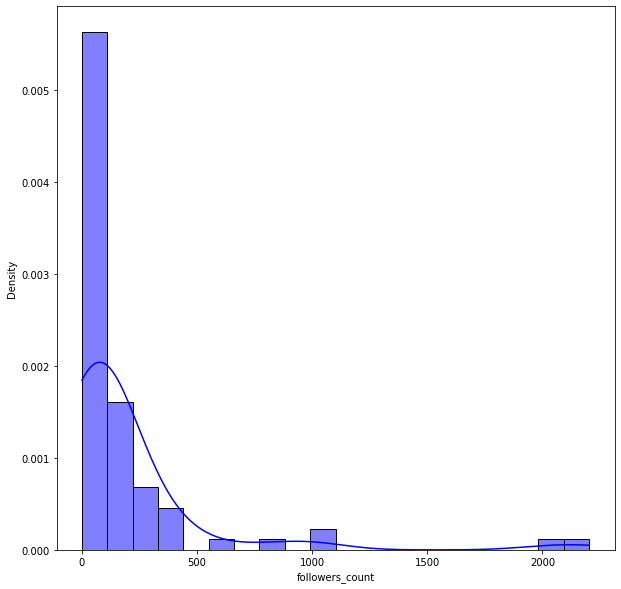

In [164]:
# Create our sample
# sampled_df = source_df.sample(n = DATA_LEN, random_state=1)
sampled_df = source_df.sample(n = DATA_LEN)
# show new dataset
base_sample = sampled_df[COL_NAME]
draw_histplot(base_sample)

C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:5311: R

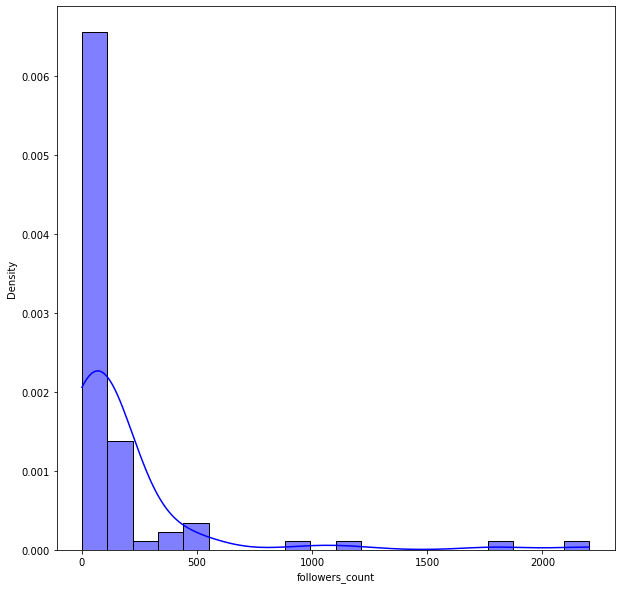

In [165]:
# Generate synthetic sample
from sdv.tabular import GaussianCopula
model = GaussianCopula()

model.fit(sampled_df)

gen_sample = model.sample(DATA_LEN)
gen_sample = gen_sample[COL_NAME]



draw_histplot(gen_sample)

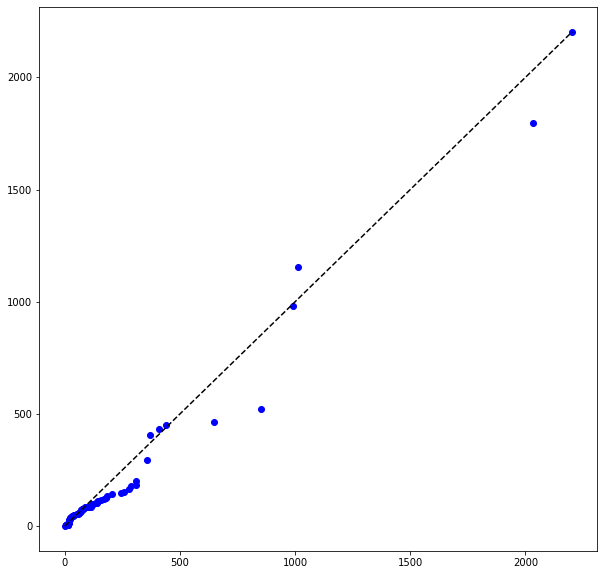

In [166]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

sorted_base = base_sample.sort_values()
sorted_gen = gen_sample.sort_values()

max_val = max(max(sorted_base), max(sorted_gen))

plt.figure(figsize=(10,10))
plt.scatter(sorted_base, sorted_gen, color = "blue")
plt.plot([0, max_val], [0, max_val], color="k", ls="--")